# Assignment 6

## METROPOLIS-HASTING

In [1]:
# Import cell 
import numpy as np 
import matplotlib.pyplot as plt
import math

In [2]:
# Utils cell
ALPHA = 3
BETA = 1

def prob_gamma(x):
    num = (BETA**ALPHA)*(x**(ALPHA-1))*np.exp(-BETA*x)
    den = math.factorial(ALPHA - 1) 
    return num/den


def prob_exp(x, lamb):
    return lamb * np.exp(-lamb*x)


def acceptance_ratio(x, y, lamb):
    pi_x = prob_gamma(x)
    pi_y = prob_gamma(y)
    
    q_x = prob_exp(x, lamb)
    q_y = prob_exp(y, lamb)
    
    num = pi_x * q_y
    den = pi_y * q_x
    
    return num/den

### Find $\lambda^*$

In [3]:
N = int(1e5)

lambdas = np.linspace(0.1, 1, 10)
nr_accepted = np.zeros(10)

for j, lamb in enumerate(lambdas):
    theta = np.zeros(N)
    theta[0] = np.random.exponential(1/lamb)
    
    for i in range(N-1):
        x = np.random.exponential(1/lamb)
        y = theta[i]
        
        ratio = acceptance_ratio(x, y, lamb)
        alpha = min(1, ratio) 
        
        if np.random.uniform(0,1) <= alpha :
            theta[i+1] = x
            nr_accepted[j] += 1
        else:
            theta[i+1] = theta[i]

acc_ratio = nr_accepted/N

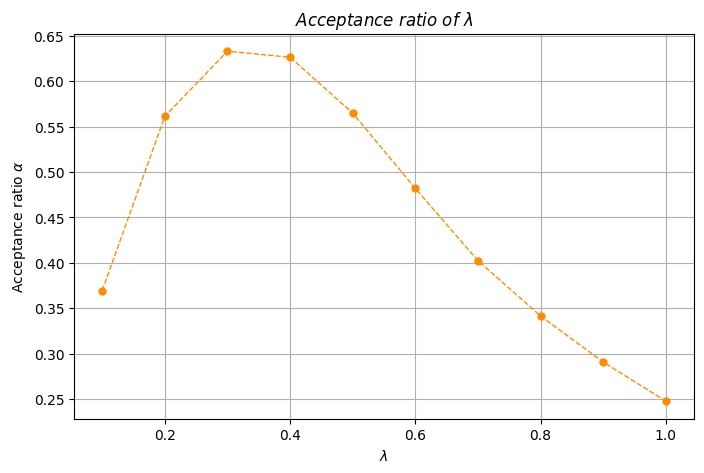

In [4]:
fig, axs = plt.subplots(1, 1, figsize=[8, 5])

axs.plot(lambdas, acc_ratio, color= "darkorange", marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs.set_xlabel ('$\lambda$', fontsize = 10)
axs.set_ylabel ('Acceptance ratio $\\alpha$', fontsize = 10)
axs.set_title(f'Acceptance ratio of $\lambda$', fontstyle = 'italic')
axs.grid()

plt.show()

In [5]:
N = int(1e5)

lambda_step = 0.01
lambdas = np.arange(0.2, 0.4, lambda_step)
nr_accepted = np.zeros(len(lambdas))

for j, lamb in enumerate(lambdas):
    theta = np.zeros(N)
    theta[0] = np.random.exponential(1/lamb)
    
    for i in range(N-1):
        x = np.random.exponential(1/lamb)
        y = theta[i]
        
        ratio = acceptance_ratio(x, y, lamb)
        alpha = min(1, ratio) 
        
        if np.random.uniform(0,1) <= alpha :
            theta[i+1] = x
            nr_accepted[j] += 1
        else:
            theta[i+1] = theta[i]

acc_ratio = nr_accepted/N

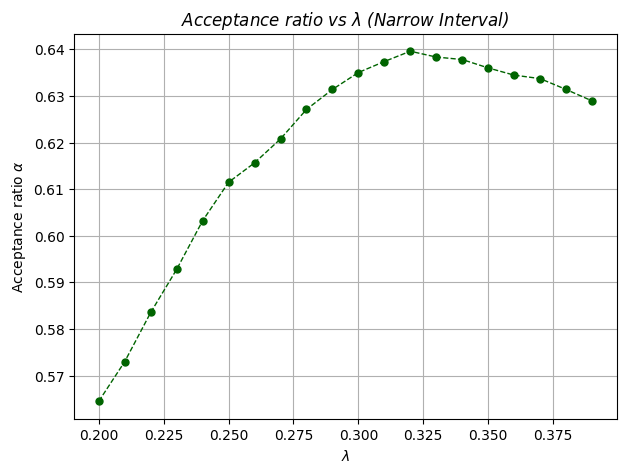

The value of the optimal lambda is: 0.3200000000000001


In [6]:
fig, axs = plt.subplots(1, 1, figsize=[7, 5])

axs.plot(lambdas, acc_ratio, color= "darkgreen", marker='o', linestyle='dashed', linewidth=1, markersize=5)
axs.set_xlabel ('$\lambda$', fontsize = 10)
axs.set_ylabel ('Acceptance ratio $\\alpha$', fontsize = 10)
axs.set_title(f'Acceptance ratio vs $\lambda$ (Narrow Interval)', fontstyle = 'italic')
axs.grid()

plt.show()

idx = np.argmax(acc_ratio)
print(f"The value of the optimal lambda is: {lambdas[idx]}")

In [7]:
NR_SIMULATIONS = int(1e6)
theta = np.zeros(NR_SIMULATIONS +1)

lambda_opt = lambdas[idx]
theta[0] = np.random.exponential(1/lambda_opt)

for i in range(NR_SIMULATIONS):
    x = np.random.exponential(1/lambda_opt)
    y = theta[i]
        
    ratio = acceptance_ratio(x, y, lambda_opt)
    alpha = min(1, ratio)

    theta[i+1] = theta[i]
    if np.random.uniform(0,1) <= alpha:
        theta[i+1] = x

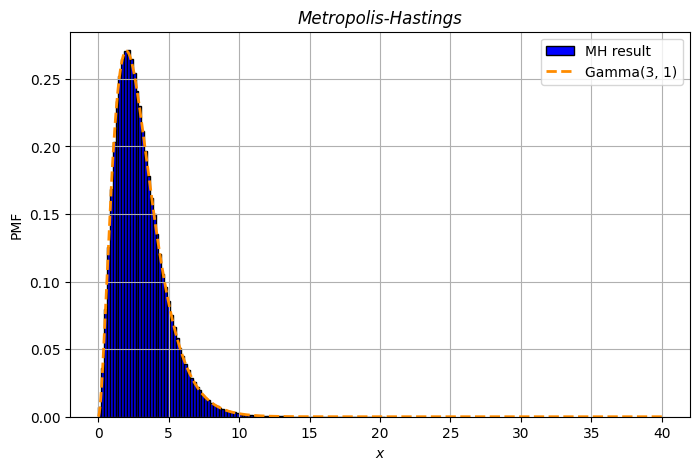

In [8]:
BINS = 100
x = np.linspace(0, 40, 2000)


fig, axs = plt.subplots(1, 1, figsize =[8,5])


axs.hist(theta, bins = BINS, color= "blue", edgecolor="black", density=True, label="MH result")
axs.plot(x, prob_gamma(x),color= "darkorange", linestyle='dashed', linewidth=2, label="Gamma(3, 1)")

axs.set_xlabel ('$x$', fontsize = 10)
axs.set_ylabel ('PMF', fontsize = 10)
axs.set_title('Metropolis-Hastings', fontstyle = 'italic')
axs.legend()
axs.grid()

plt.show()


In [9]:
print(f"The mean is {theta.mean():.4f} and the variance is {theta.var():.4f}")

The mean is 3.0015 and the variance is 2.9962


In the $Gibbs\ Sampler$ algorithm we need to be able to simulate from conditional distributions, as well as from one of the marginals. On the opposite, in the $Metropolis\ Hastings$ algorithm it is not needed. Since we simulate random variables from a proposal distribution. Even if the choice od the proposal distribution is **crucial** to obtain an efficient algorithm, in principle any kind of ditributions can be used. 
This is the motivation why the Metropolis-Hasting is more generally applicable amon the two algorithms. 